In [1]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing import image

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
X_train.shape


(60000, 28, 28)

In [6]:

X_test.shape

(10000, 28, 28)

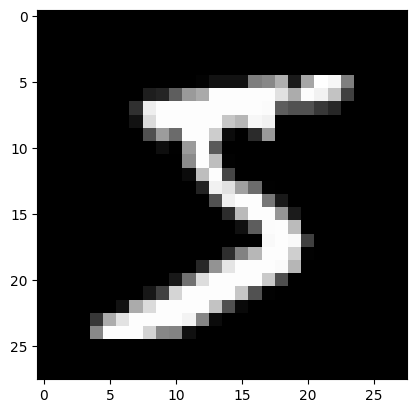

In [7]:
single_image= X_train[0]
single_image.shape
plt.imshow(single_image,cmap='gray')

In [8]:
y_train.shape

(60000,)

In [9]:
#checking the grayscale value range of the images
print(X_train.min())
print(X_train.max())

#to bring value to 0-1 range
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

print(X_train_scaled.min())
print(X_train_scaled.max())

0
255
0.0
1.0


In [10]:
y_train[0]

y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

print(type(y_train_onehot))
y_train_onehot.shape

<class 'numpy.ndarray'>


(60000, 10)

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

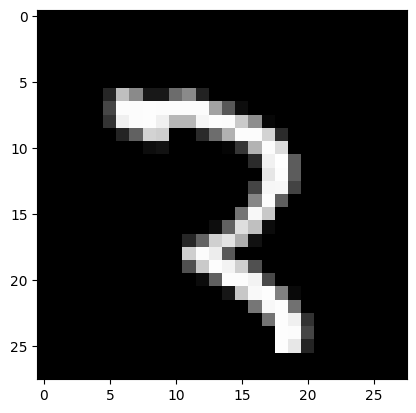

In [11]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

y_train_onehot[500]

In [12]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [14]:
#network model
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 32)                173088    
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 173738 (678.66 KB)
Trainable params: 173738 (678.66 KB)
Non-trainable params: 0 (0.00 Byte)
______________

In [15]:
metrics = pd.DataFrame(model.history.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.236279,0.932400,0.088160,0.9747
1,0.076776,0.977333,0.064151,0.9802
2,0.054228,0.983533,0.063625,0.9799
3,0.043909,0.986850,0.052884,0.9803
4,0.035007,0.989383,0.053426,0.9823


<Axes: >

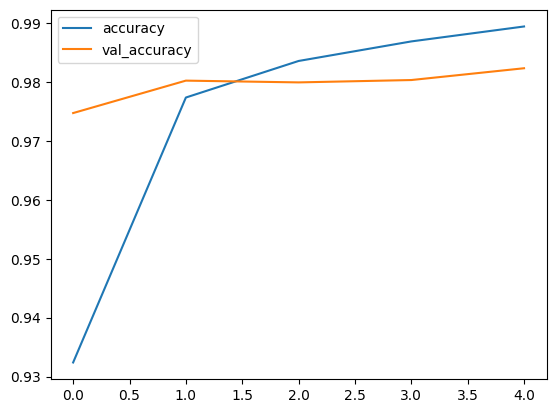

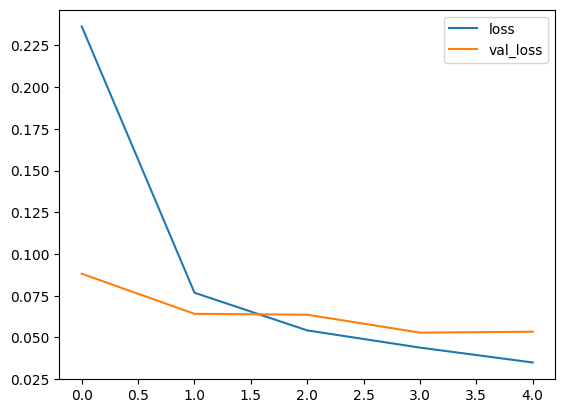

In [16]:
metrics[['accuracy','val_accuracy']].plot()
metrics[['loss','val_loss']].plot()

In [17]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)
print(confusion_matrix(y_test,x_test_predictions))
print(classification_report(y_test,x_test_predictions))

313/313 [==============================] - 4s 11ms/step
[[ 974    0    1    1    0    0    4    0    0    0]
 [   0 1132    2    0    0    0    0    1    0    0]
 [   3    3 1013    0    3    0    0    7    2    1]
 [   2    0    7  986    0    5    3    3    4    0]
 [   1    0    0    0  979    0    0    0    0    2]
 [   1    0    1    5    0  873    8    0    3    1]
 [   6    2    0    0    3    2  944    0    1    0]
 [   0    3    9    0    1    0    0 1013    1    1]
 [   8    0    7    2    6    2    3    4  934    8]
 [   3    3    0    0   16    4    0    6    2  975]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      1.00      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.99      0.98      0.98      1010
           4       0.97      1.00      0.98       982
           5       0.99      0.98      0.98       892
           6       0.98      0.99 

1/1 [==============================] - 0s 37ms/step
[3]


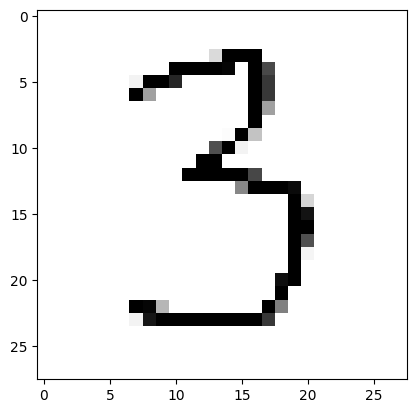

In [21]:
#prediction for single input- 1
img = image.load_img('image.png')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0


x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)
print(x_single_prediction)

plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

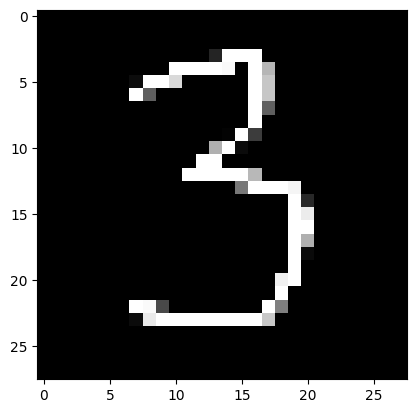

In [22]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0
plt.imshow(img_28_gray_inverted_scaled.reshape(28,28),cmap='gray')

In [23]:
x_single_prediction = np.argmax(model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)), axis=1)
print(x_single_prediction)

1/1 [==============================] - 0s 91ms/step
[3]
